# Interpolation of data
- Börge Göbel

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import math

## 1. Taylor expansion

You can expand any continuous function as a polynomials

\\( f(x)=\sum_{n=0}^\infty \frac{1}{n!}f^{(n)}(x_0)\,(x-x_0)^n\\)

Here, \\( f^{(n)} \\) is the nth derivative and \\( x_0 \\) is the argument around which we expand the function

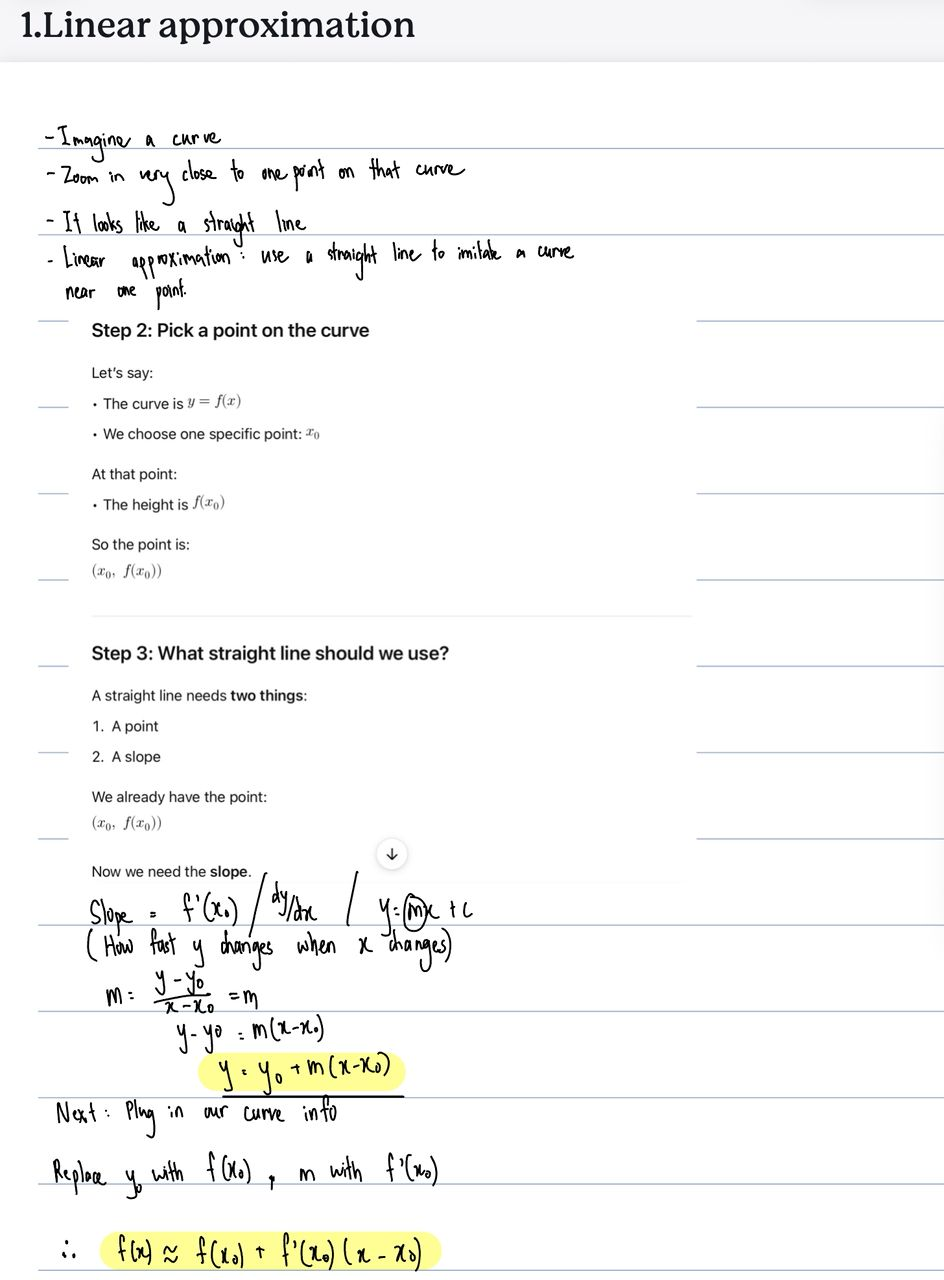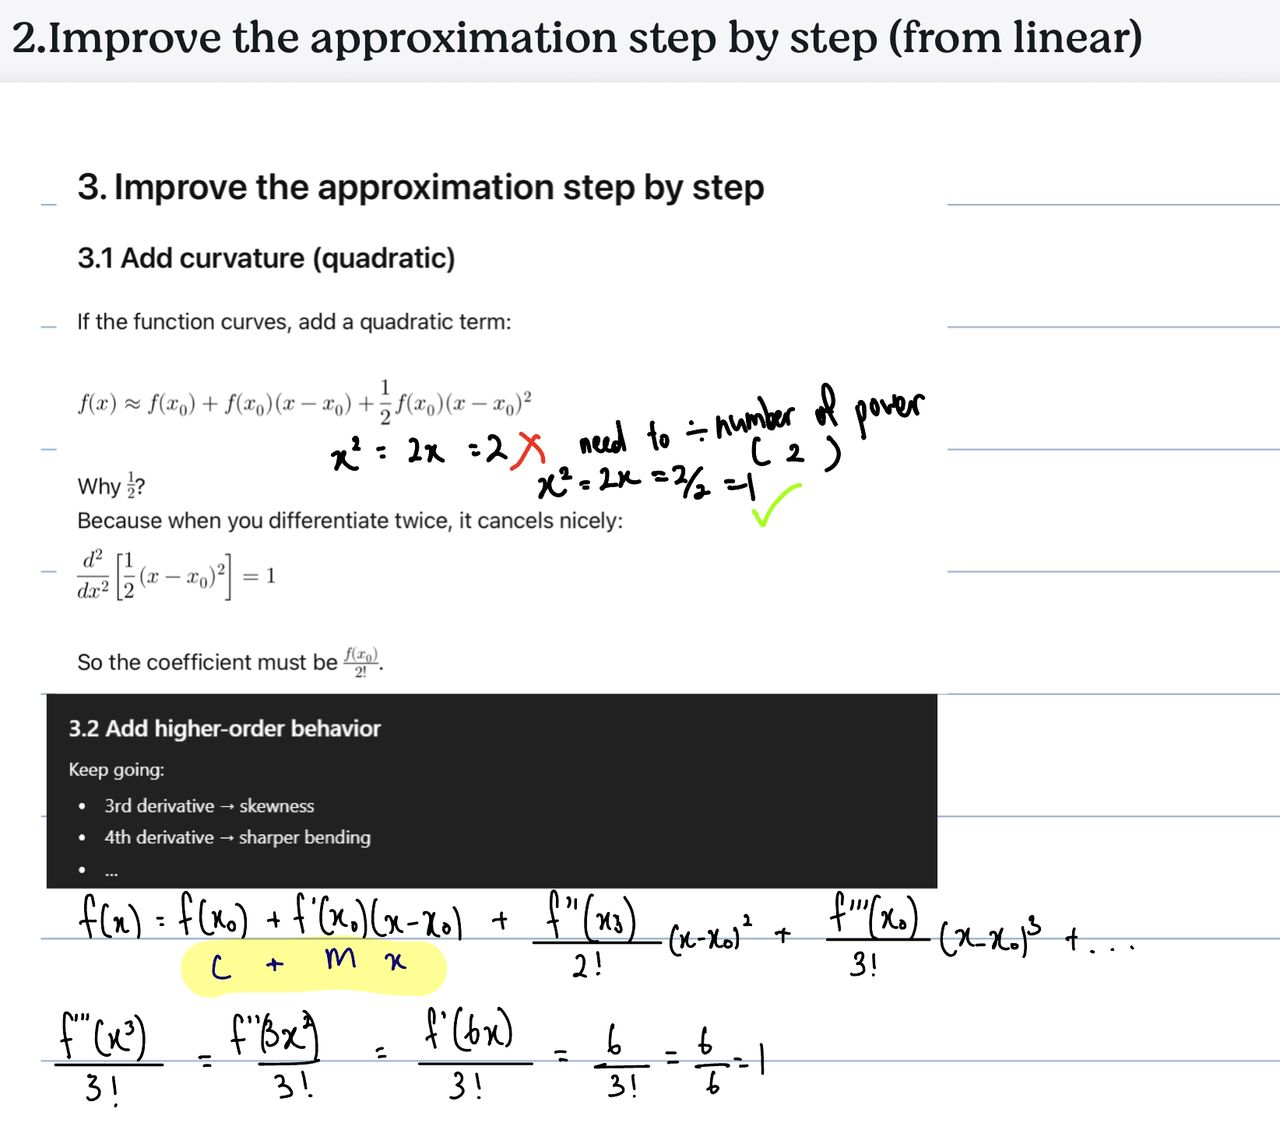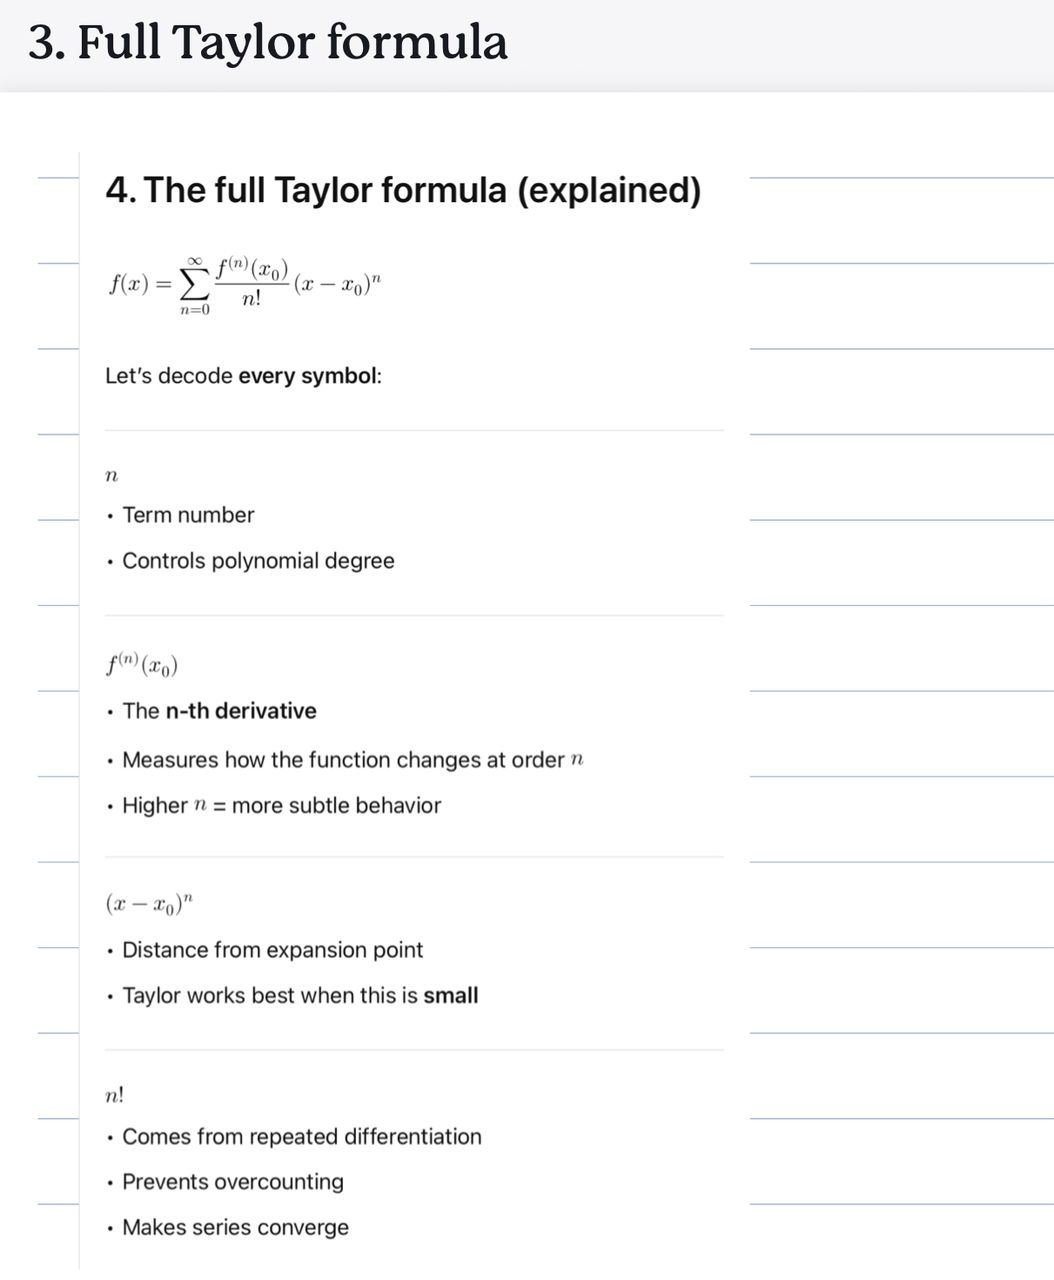

### 1.1 Example: Exponential function

\\( f(x)=f'(x)=f''(x)=\dots=f^{(n)}(x)=\exp(x) \\)

In [3]:
def expTaylor(x,x0,nmax):
    #x: Argument
    #x0: Argument at which derivatives will be calculated
    #nmax: n at which series will terminate
    t = 0
    for n in range (nmax+1):
        t = t + np.exp(x0)* (x-x0)**n / math.factorial(n)
    return t

In [4]:
expTaylor(1,0,10)

np.float64(2.7182818011463845)

In [5]:
np.exp(1)

np.float64(2.718281828459045)

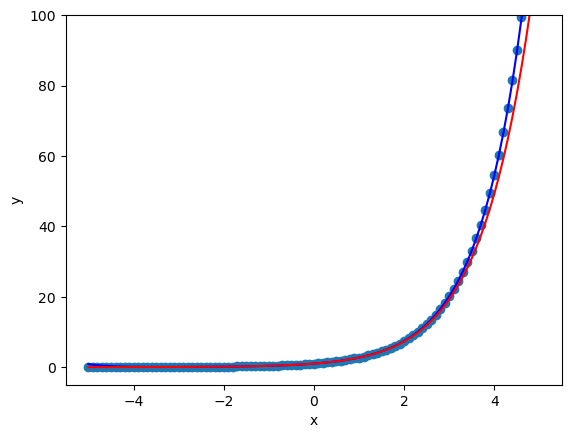

In [6]:
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-5,100])
x_list = np.linspace(-5,5,101)
plt.scatter(x_list, np.exp(x_list))
nmax = 10
plt.plot(x_list, expTaylor(x_list, 0, nmax),'blue')
plt.plot(x_list, expTaylor(x_list, -3, nmax),'red')


### 1.2 Example: sin function at \\(x_0 = 0\\)

\\( f(0) = f''(0) = f^{(4)}(0) = \dots = 0 \\)

\\( f'(0) = f^{(5)}(0) = f^{(9)}(0) = \dots = 1 \\)

\\( f'''(0) = f^{(7)}(0) = f^{(11)}(0) = \dots = -1 \\)

\\( \sin(x) = x - \frac{1}{3!}x^3 + \frac{1}{5!}x^5  - \frac{1}{7!}x^7 \pm \dots = \sum_{n=0}^\infty \frac{(-1)^n}{(2n+1)!}x^{2n+1}\\)

In [7]:
def sinTaylor(x,nmax):
    #x: Argument
    #nmax: n at which series will terminate
    t = 0
    for n in range (nmax+1):
        t = t + (-1)**n* x**(2*n+1)/math.factorial(2*n+1)
    return t

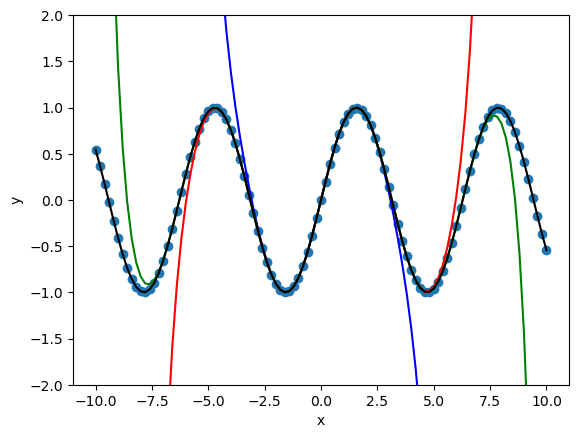

In [8]:
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-2,2])
x_list = np.linspace(-10,10,101)
plt.scatter(x_list, np.sin(x_list))

plt.plot(x_list, sinTaylor(x_list, 3),'blue')
plt.plot(x_list, sinTaylor(x_list, 6),'red')
plt.plot(x_list, sinTaylor(x_list, 9),'green')
plt.plot(x_list, sinTaylor(x_list, 18),'black')


- Accuracy of \\( \sin(10.5) \\)

In [9]:
math.sin(10.5)-sinTaylor(10.5,50)

-2.845501612114276e-13

### 1.3 Implementation of a general function

Derivative (more details in separate section): \\( f'(x) = \lim_{h\rightarrow 0} \frac{f(x+h)-f(x)}{h} \\)

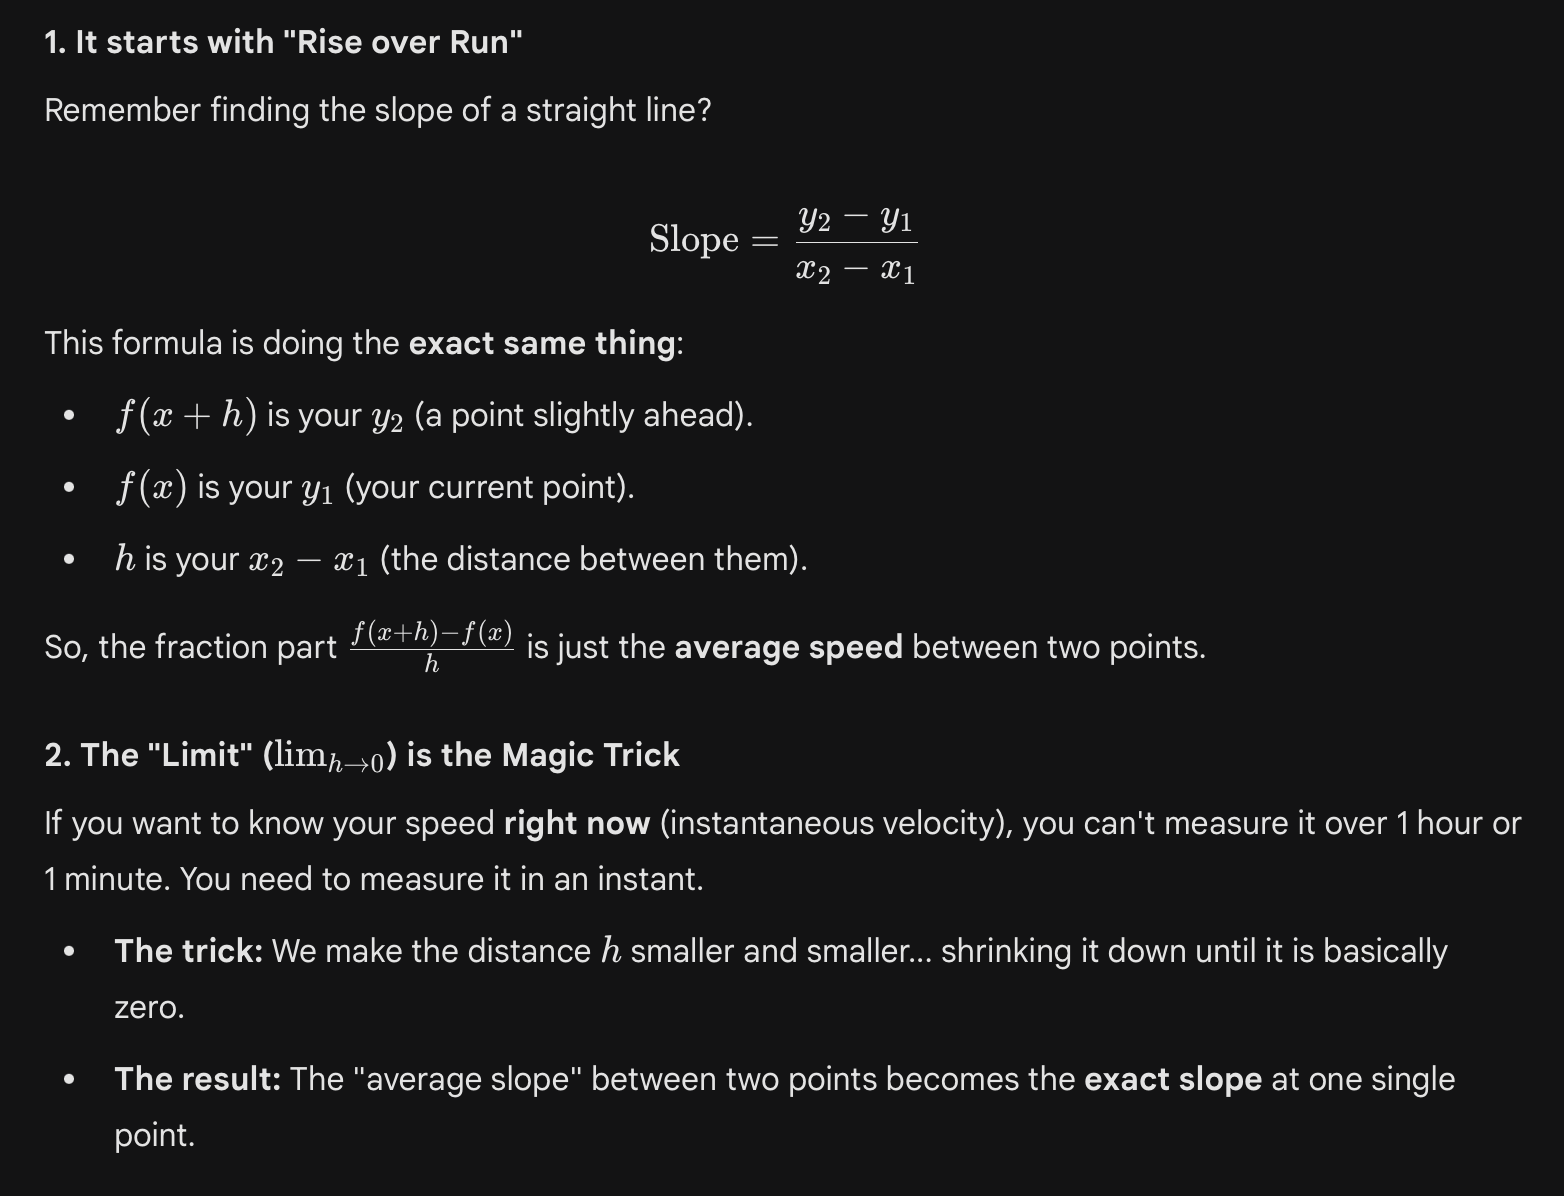

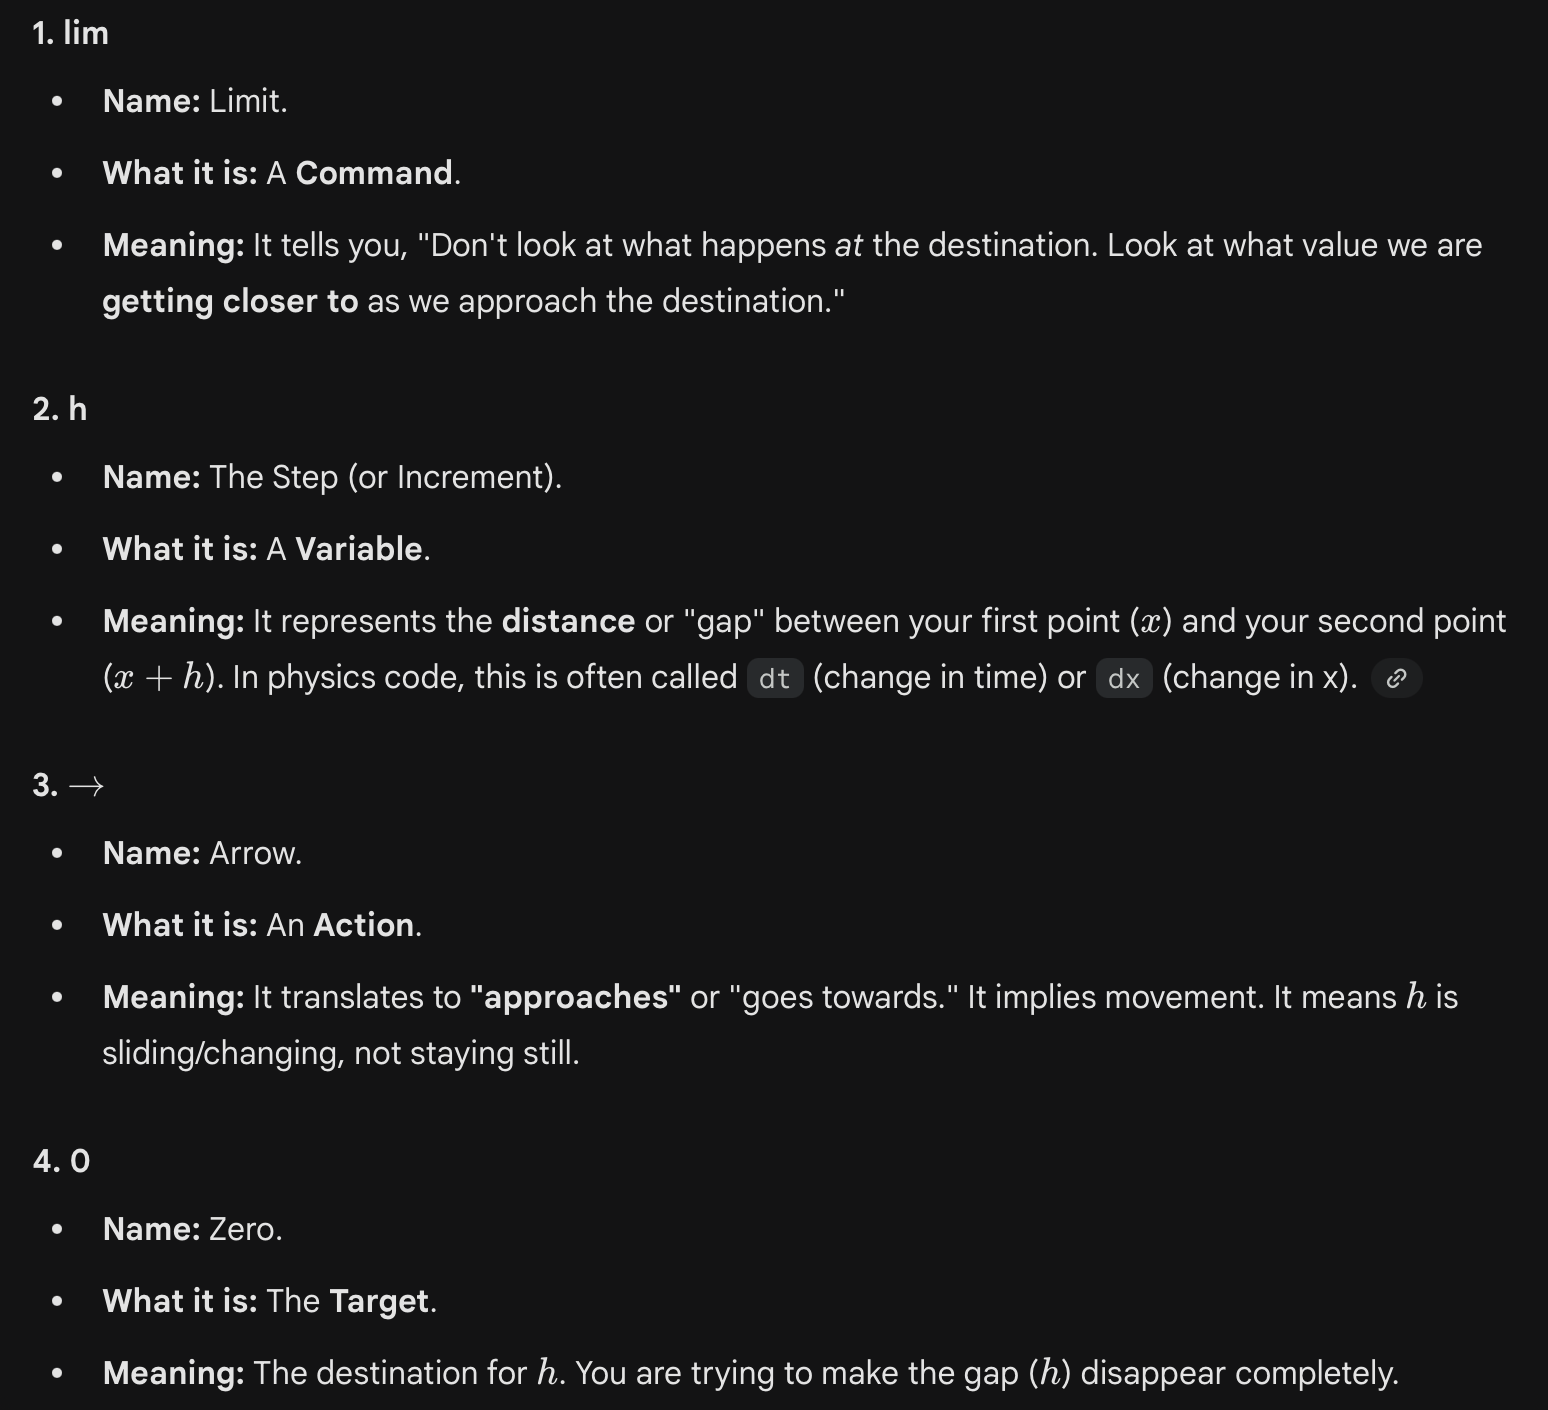

In [10]:
def derivative(f,x,h):
    # f: function
    # x: argument
    # h: stepsize
    return(f(x+h)-f(x))/h

In [11]:
def func(x):
    return 2*np.sin(x)**2 +x

In [12]:
x0 = 10.5
h = 0.1

In [13]:
func(x0)

np.float64(12.04772926022427)

In [14]:
derivative (func, x0, h)

np.float64(2.5529969724111723)

Higher derivatives: \\( f^{(n)}(x) = \lim_{h\rightarrow 0} \frac{1}{h^n}\sum_{k=0}^n(-1)^{k+n} \,\frac{n!}{k!(n-k)!} \,f(x+kh)\\)

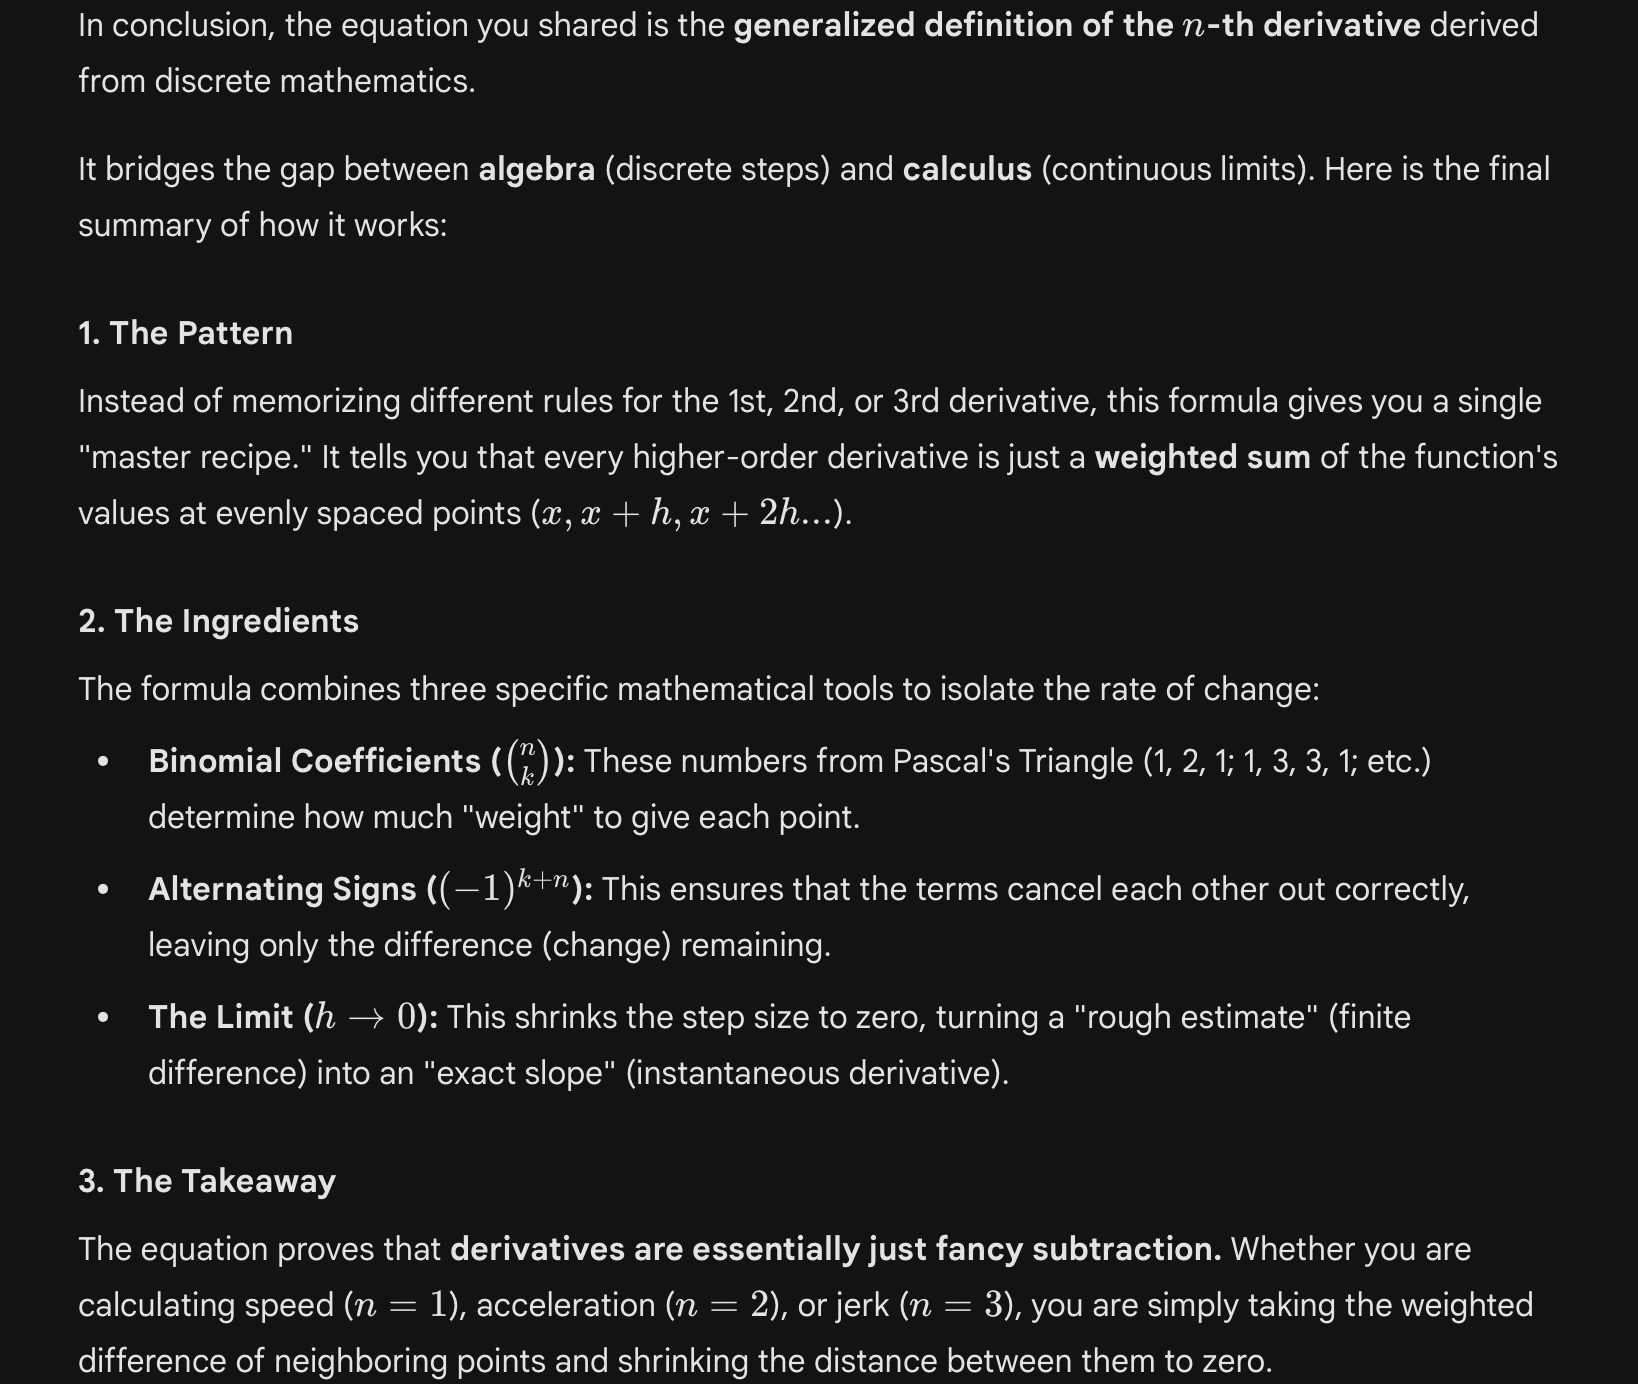

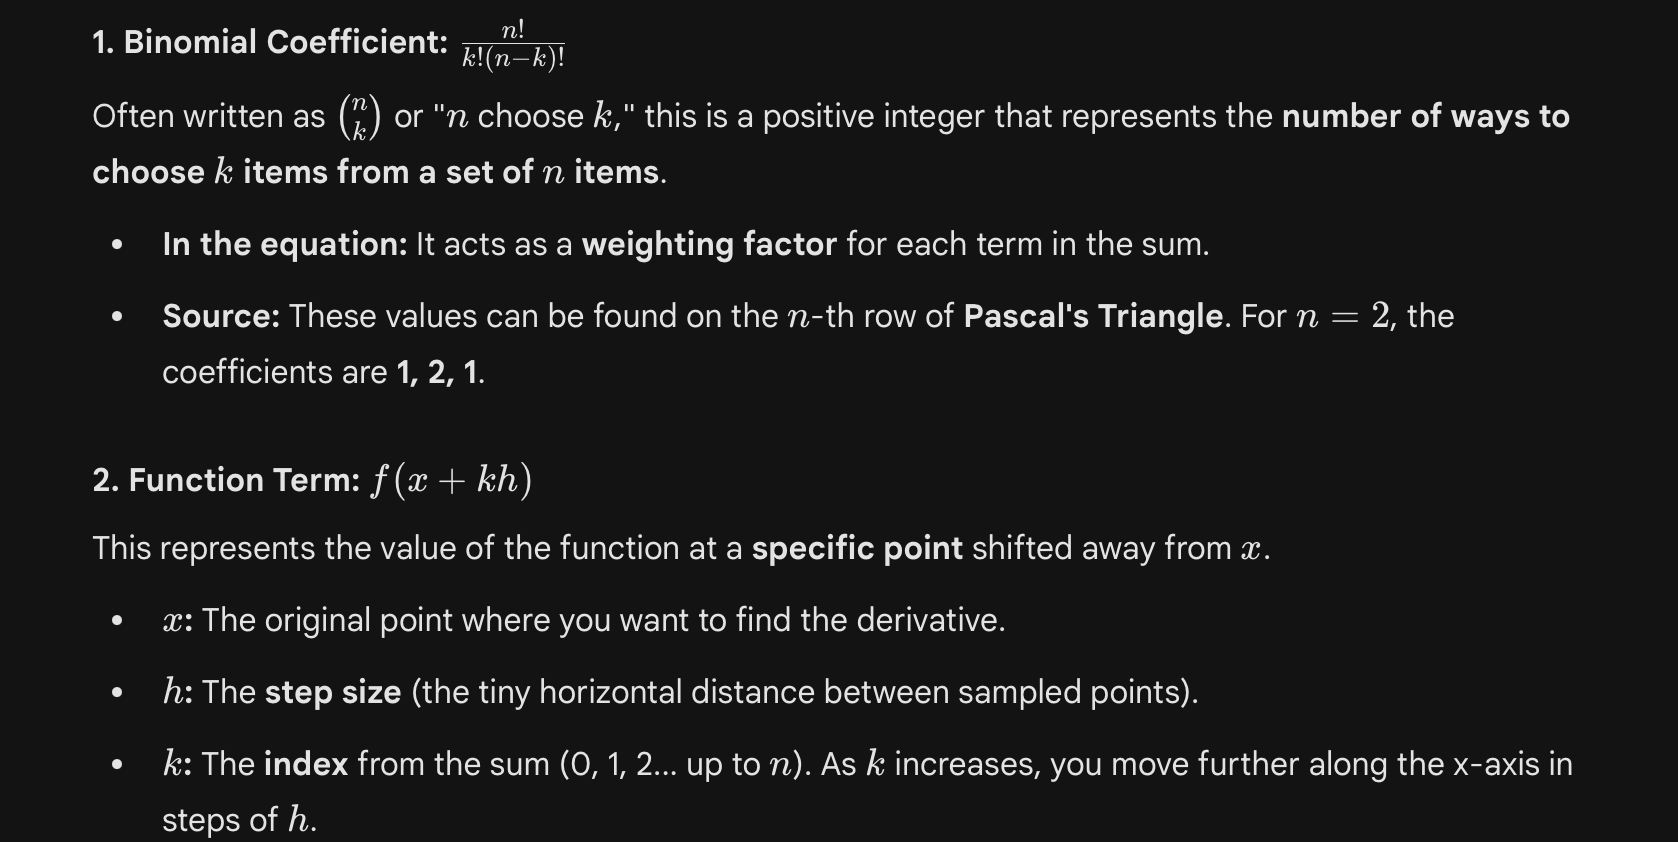

In [15]:
def nDerivative(f,x,h,n):
    #f: Function
    #x: Argument of f
    #h: stepsize
    #n: nth derivative
    t = 0
    for k in range (n+1):
        t = t+ (-1)**(k+n)*math.factorial(n)/(math.factorial(k)*math.factorial(n-k))*(f(x+k*h))
    return t /h**n

In [16]:
nDerivative (func, x0, h, 0)

np.float64(12.04772926022427)

In [17]:
nDerivative (func, x0, h, 1)

np.float64(2.5529969724111723)

In [18]:
nDerivative (func, x0, h, 2)

np.float64(-2.802754599797907)

In [19]:
def taylor(f, x, x0, nmax, h):
    #f: Function
    #x: Argument
    #h: Stepsize
    #x0: Argument at which the derivatives will be calculated
    #nmax: b at which the series will terminate
    t = 0
    for n in range(nmax+1):
        t = t + nDerivative(f,x0,h,n) * (x-x0)**n / math.factorial(n)
    return t
    

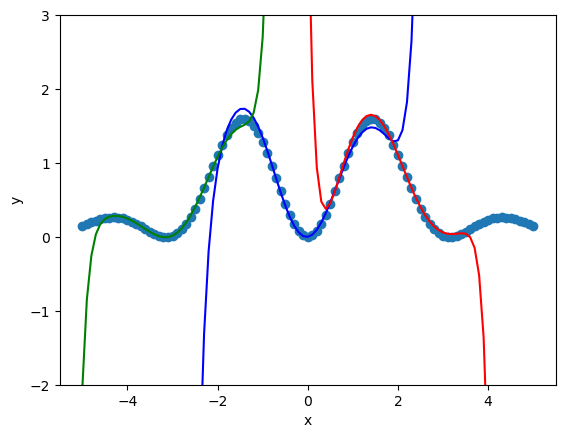

In [20]:
def func(x):
    return 2*np.sin(x)**2*np.exp(-0.1*x**2)

plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-2,3])
x_list = np.linspace(-5,5,101)
plt.scatter(x_list, func(x_list))

nmax = 15
h = 0.05
plt.plot(x_list, taylor(func, x_list,0,nmax,h),'blue')
plt.plot(x_list, taylor(func, x_list,2,nmax,h),'red')
plt.plot(x_list, taylor(func, x_list,-3,nmax,h),'green')



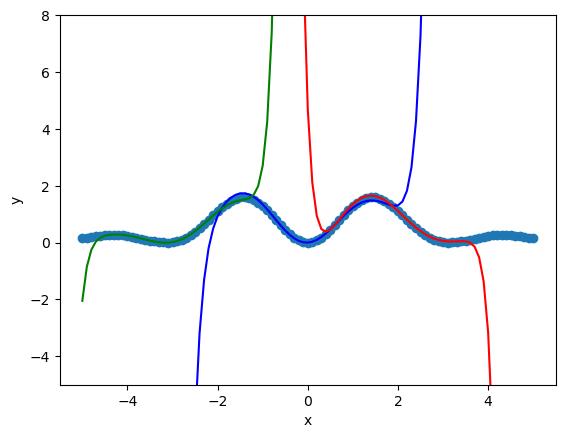

In [21]:
plt.xlabel('x')
plt.ylabel('y')
plt.ylim([-5,8])
x_list = np.linspace(-5,5,101)
plt.scatter(x_list, func(x_list))

nmax = 15
h = 0.05
plt.plot(x_list, taylor(func, x_list,0,nmax,h),'blue')
plt.plot(x_list, taylor(func, x_list,2,nmax,h),'red')
plt.plot(x_list, taylor(func, x_list,-3,nmax,h),'green')

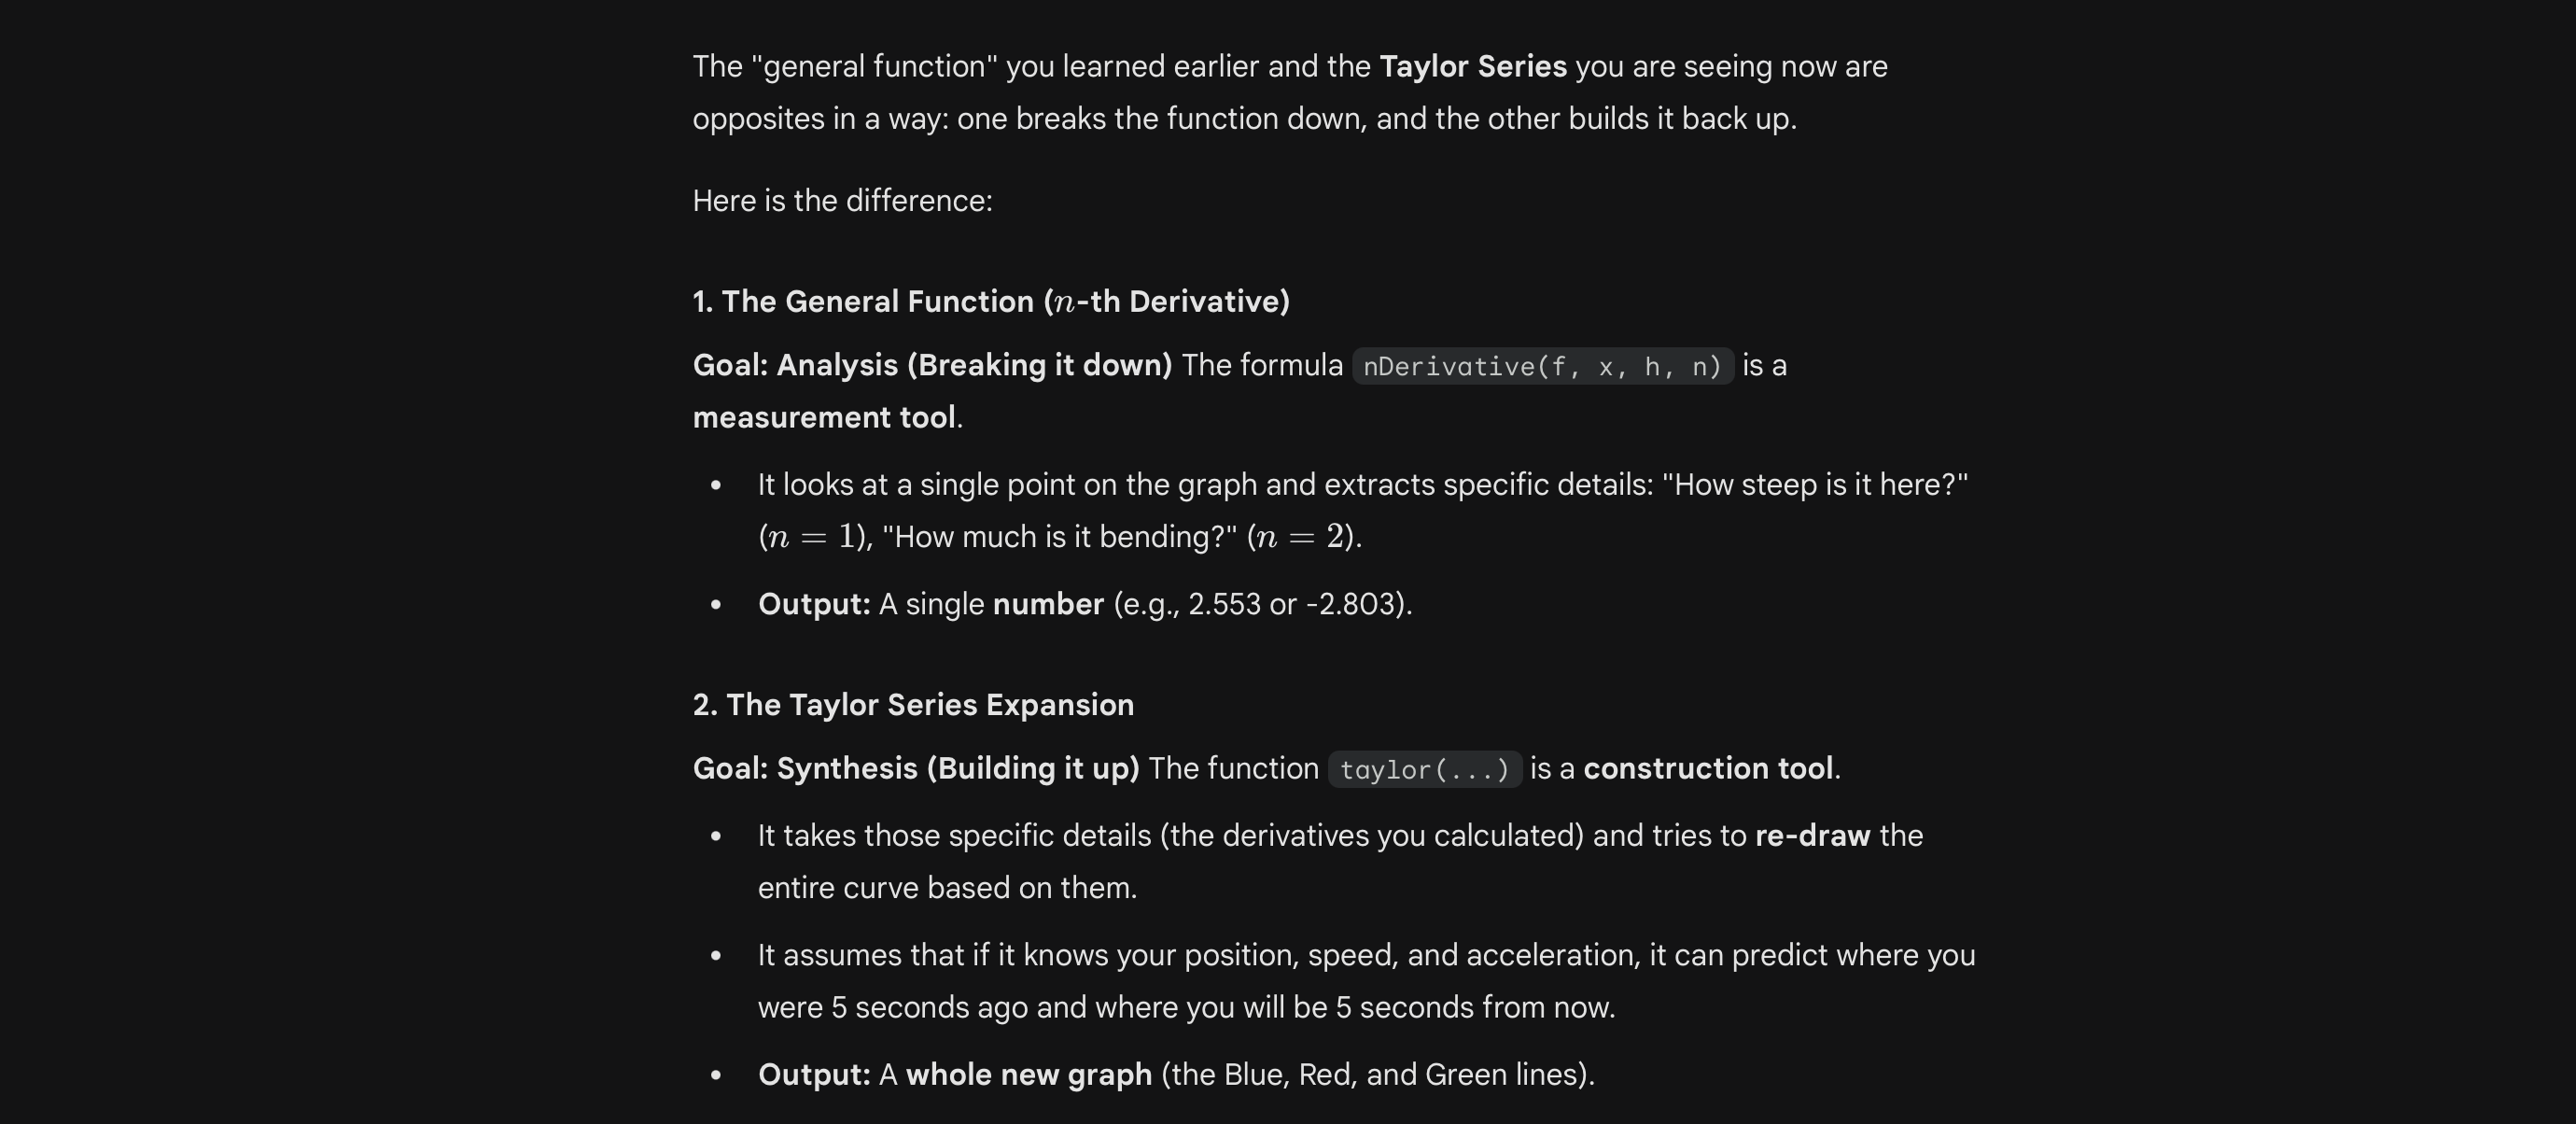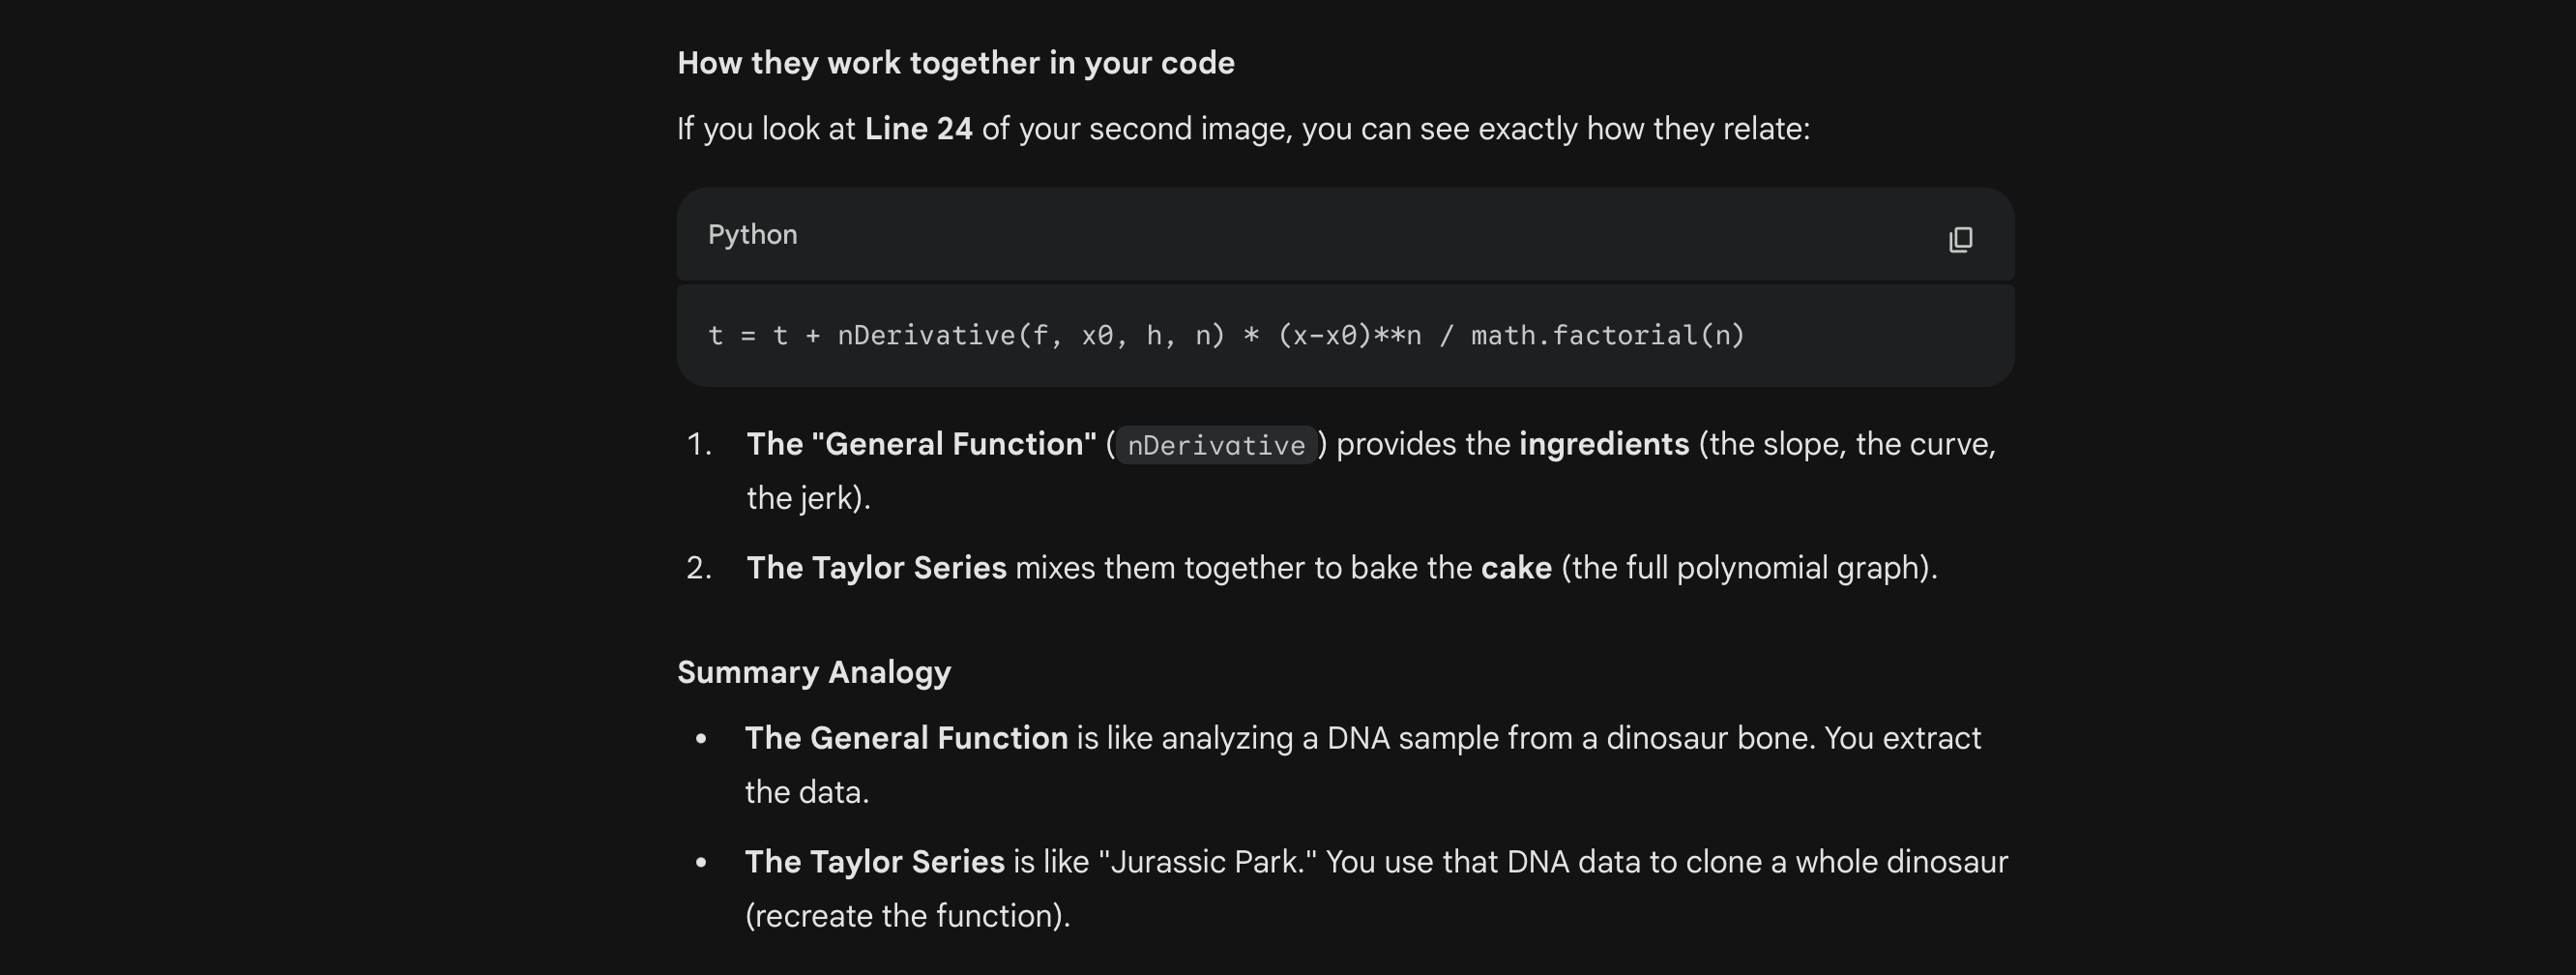

## 2. Interpolation

### 2.1 Generate data points

In [22]:
def correctFunction(x):
    return 15 + 2.4*x - 0.5*x**2 - 0.35*x**3

In [23]:
npoints = 21
x_list = np.linspace (-5, 5, npoints)
data0 = np.array([x_list, correctFunction(x_list)])

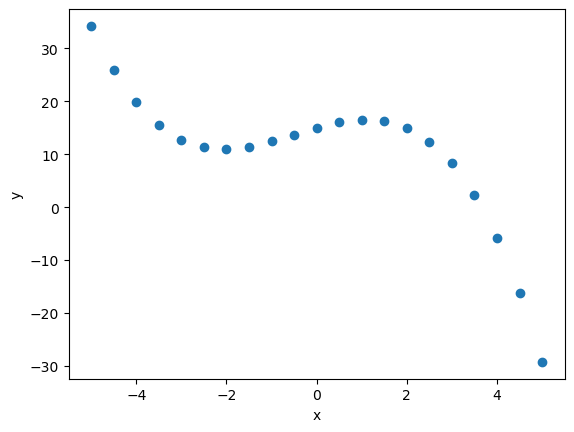

In [24]:
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data0[0], data0[1])

Modify x and y values by adding random numbers

In [25]:
0.1*(2*np.random.rand(npoints)-1)

array([ 0.04609369,  0.03668879,  0.0231037 , -0.01730068,  0.05961206,
       -0.00498466,  0.03765035,  0.07884812, -0.02430333, -0.06961626,
       -0.06147268,  0.02034951, -0.05095645,  0.00022887, -0.04837415,
        0.00979349, -0.05607237, -0.02779209,  0.00822199, -0.02425208,
       -0.03923841])

In [26]:
# Added [ ] around the two parts
data = np.array([
    data0[0] + 0.25 * (2 * np.random.rand(npoints) - 1), 
    data0[1] + 5.0 * (2 * np.random.rand(npoints) - 1)
])

#This line of code is used to create a "noisy" dataset by adding random variations to your original clean data.
#In the context of your Spline Interpolation project, you are simulating real-world measurements, which are rarely perfect.

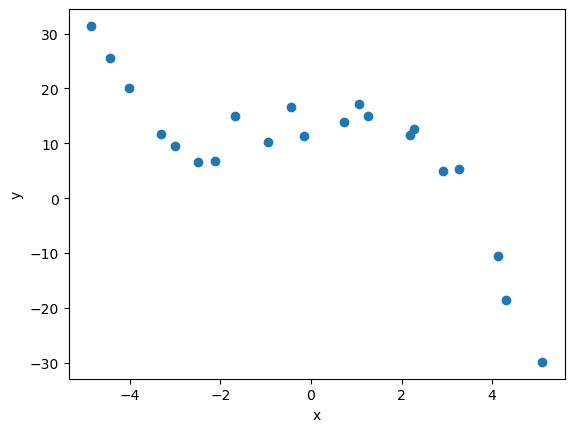

In [27]:
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data[0],data[1])
#plt.plot(data0[0],data0[1],'black')

## 2.2 Spline interpolation

A spline interpolation always fits the data perfectly and even has a continuous derivative, if a cubic spline is used.

The spline is defined piecewise.

### 2.2.1 Unperturbed data

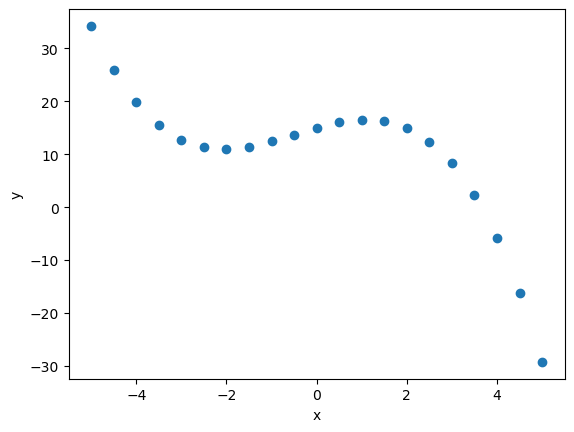

In [28]:
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data0[0], data0[1])

In [29]:
from scipy import interpolate

- linear splines

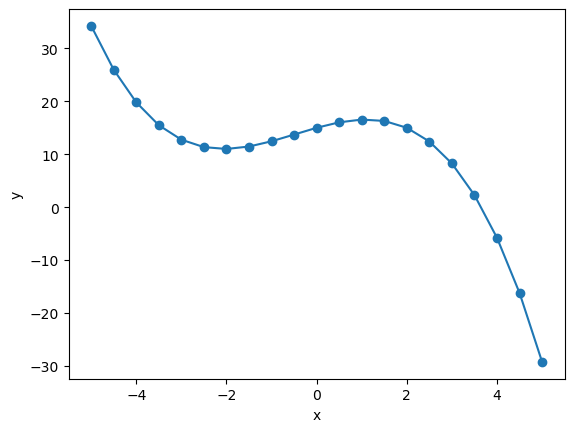

In [30]:
splineLinear0 = interpolate.interp1d(data0[0],data0[1], kind ='linear')

plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data0[0], data0[1])

plt.plot(data0[0], splineLinear0(data0[0]))

- zoom

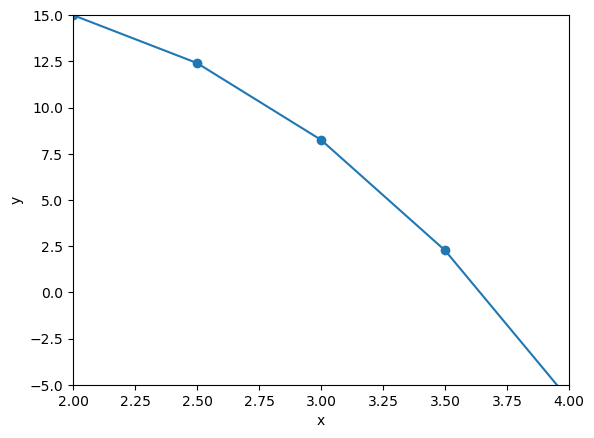

In [31]:
splineLinear0 = interpolate.interp1d(data0[0],data0[1], kind ='linear')

plt.xlabel('x')
plt.ylabel('y')
plt.xlim([2,4])
plt.ylim([-5,15])
plt.scatter(data0[0], data0[1])

x_list = np.linspace(2,4,201)
plt.plot(x_list, splineLinear0(x_list))

- cubic spline

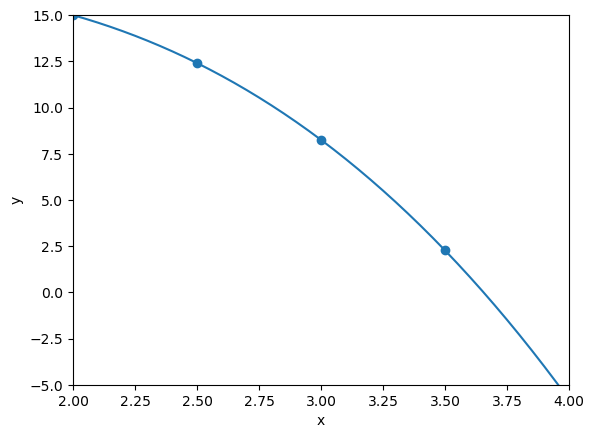

In [32]:
splineCubic0 = interpolate.interp1d(data0[0],data0[1], kind ='cubic')

plt.xlabel('x')
plt.ylabel('y')
plt.xlim([2,4])
plt.ylim([-5,15])
plt.scatter(data0[0], data0[1])

x_list = np.linspace(2,4,201)
plt.plot(x_list, splineCubic0(x_list))

### 2.2.2 Perturbed data

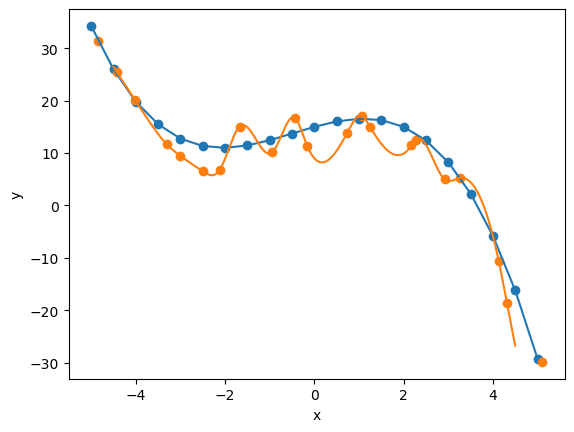

In [38]:
splineCubic = interpolate.interp1d(data[0],data[1], kind ='cubic')

plt.xlabel('x')
plt.ylabel('y')
plt.scatter(data0[0], data0[1])
plt.plot(data0[0],data0[1])
x_list=np.linspace(-4.5,4.5,901)
plt.scatter(data[0],data[1])
plt.plot(x_list, splineCubic(x_list))

- How to handle data which is not smooth?

In [43]:
splineSmooth = interpolate.UnivariateSpline(data[0],data[1])
splineSmooth.set_smoothing_factor(500)

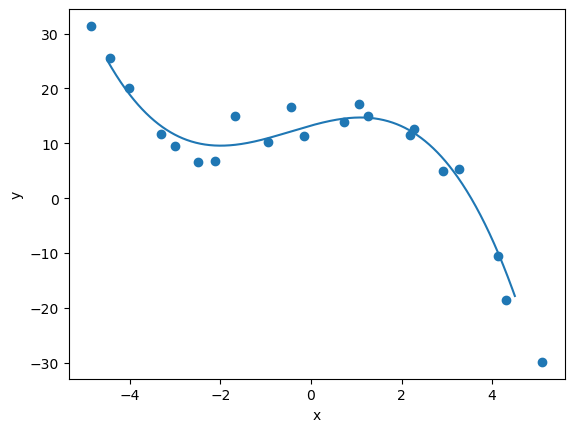

In [44]:
plt.xlabel('x')
plt.ylabel('y')

x_list=np.linspace(-4.5,4.5,901)
plt.scatter(data[0],data[1])
plt.plot(x_list, splineSmooth(x_list))

## 2.3 Fitting a model function

Choose ideal parameters of a (physically motivated) model function such that error is minimized.

### 2.3.1 Define model function

For practice, we consider a polynomial: \\( f(x) = a_0 + a_1 x + a_2 x^2 + \dots + a_n x^n = \sum_{k=0}^n a_k x^k\\)

### 2.3.2 Define error 

There are many reasonable definitions of an error function but a very common choice is: \\( \Delta = \sum_{i=1}^n \left(y_i-f(x_i)\right)^2\\)

\\( f \\) is the fit function that is determined by the coefficients \\( a_i \\) in our case.

\\( (x_i, y_i) \\) are the data points that we try to fit.

### 2.3.3 Update coefficients to reduce the error (gradient descent)

We can use several different methods to minimize the error, e. g. a Monte-Carlo algorithm. Here, we will use the gradient descent method. The coefficients \\( a_i \\) will be updated along the gradient direction of the error function \\( \nabla_{\vec{a}} \Delta\\). The gradient consists of elements \\( \frac{\partial}{\partial a_k} \Delta = -2 \sum_{i=1}^n \left(y_i-f(x_i)\right) \frac{\partial}{\partial a_k}f(x_i) = -2 \sum_{i=1}^n \left(y_i-f(x_i)\right) x_i^{k}\\)

### 2.3.4 Loop for the actual fitting

- Comparison of a and a0